In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

▲预先执行的代码

In [2]:
height = [178,190,187,179,192,186,188,1.81,187,177,190,181,178,180,171]
ser = pd.Series(height)
ser

0     178.00
1     190.00
2     187.00
3     179.00
4     192.00
5     186.00
6     188.00
7       1.81
8     187.00
9     177.00
10    190.00
11    181.00
12    178.00
13    180.00
14    171.00
dtype: float64

▲ 程序清单 6.41 Series 对象的创建

In [3]:
mean = ser.mean()
std = ser.std(ddof=0)
print(mean)
print(std)

171.054
45.60205577237353


▲ 程序清单 6.42 从 Series 对象中计算出平均值和标准差

In [4]:
zscore = (ser - mean) / std
zscore

0     0.152318
1     0.415464
2     0.349677
3     0.174247
4     0.459321
5     0.327748
6     0.371606
7    -3.711324
8     0.349677
9     0.130389
10    0.415464
11    0.218104
12    0.152318
13    0.196175
14   -0.001184
dtype: float64

▲ 程序清单 6.43 计算出 z 分数

In [5]:
ser[(zscore < -3) | (zscore > 3)]

7    1.81
dtype: float64

▲ 程序清单 6.44 基于 z 分数检测离群值

In [6]:
print(ser[14])
print(mean)

171.0
171.054


▲ 程序清单 6.45 平均值和索引标签 14 的元素

In [7]:
ser2 = ser[5:10]
ser2

5    186.00
6    188.00
7      1.81
8    187.00
9    177.00
dtype: float64

In [8]:
mean2 = ser2.mean()
std2 = ser2.std(ddof=0)
zscore2 = (ser2 - mean2) / std2
print(mean2)
print(zscore2)

147.962
5    0.519778
6    0.547107
7   -1.997122
8    0.533442
9    0.396795
dtype: float64


▲ 程序清单 6.46 计算出索引 5 ～ 9 的 z 分数

In [9]:
q1 = ser.quantile(0.25)
q3 = ser.quantile(0.75)
iqr = q3 - q1
print('q1 = ', q1)
print('q3 = ', q3)
print('IQR = ', iqr)

q1 =  178.0
q3 =  187.5
IQR =  9.5


▲ 程序清单 6.47 使用 quantile 方法计算出四分位距（IQR）

In [10]:
bottom = q1 - (1.5 * iqr)
up = q3 + (1.5 * iqr)
print(bottom)
print(up)

163.75
201.75


▲ 程序清单 6.48 计算出下方和上方的界点

In [11]:
ser[(ser < bottom) | (ser > up)]

7    1.81
dtype: float64

▲  程序清单 6.49 基于 IQR 检测离群值

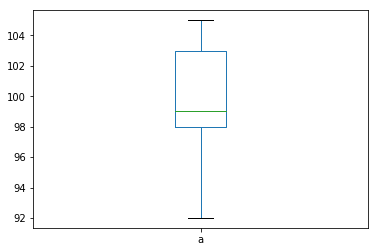

In [12]:
val = [100,104,92,98,98,105,]
df = pd.DataFrame({'a':val})
df.plot(kind='box')

▲ 程序清单 6.50 使用 DataFrame 对象绘制箱形图

In [13]:
q1 = df['a'].quantile(0.25)
q2 = df['a'].quantile(0.5)
q3 = df['a'].quantile(0.75)
iqr = q3 - q1
dfmax = df['a'].max()
dfmin = df['a'].min()
print('q1 = ',q1)
print('q2 = ',q2)
print('q3 = ',q3)
print('iqr = ',iqr)
print('max = ',dfmax)
print('min = ',dfmin)

q1 =  98.0
q2 =  99.0
q3 =  103.0
iqr =  5.0
max =  105
min =  92


▲ 程序清单 6.51 计算出 DataFrame 对象的概括统计量

In [14]:
df['b'] = [100,104,90,98,98,105]
df

,a,b
0,100,100
1,104,104
2,92,90
3,98,98
4,98,98
5,105,105


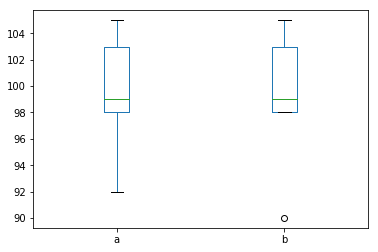

In [15]:
df.plot(kind='box')

▲ 程序清单 6.52 使用包含离群值的 DataFrame 对象绘制箱形图